imported
imported


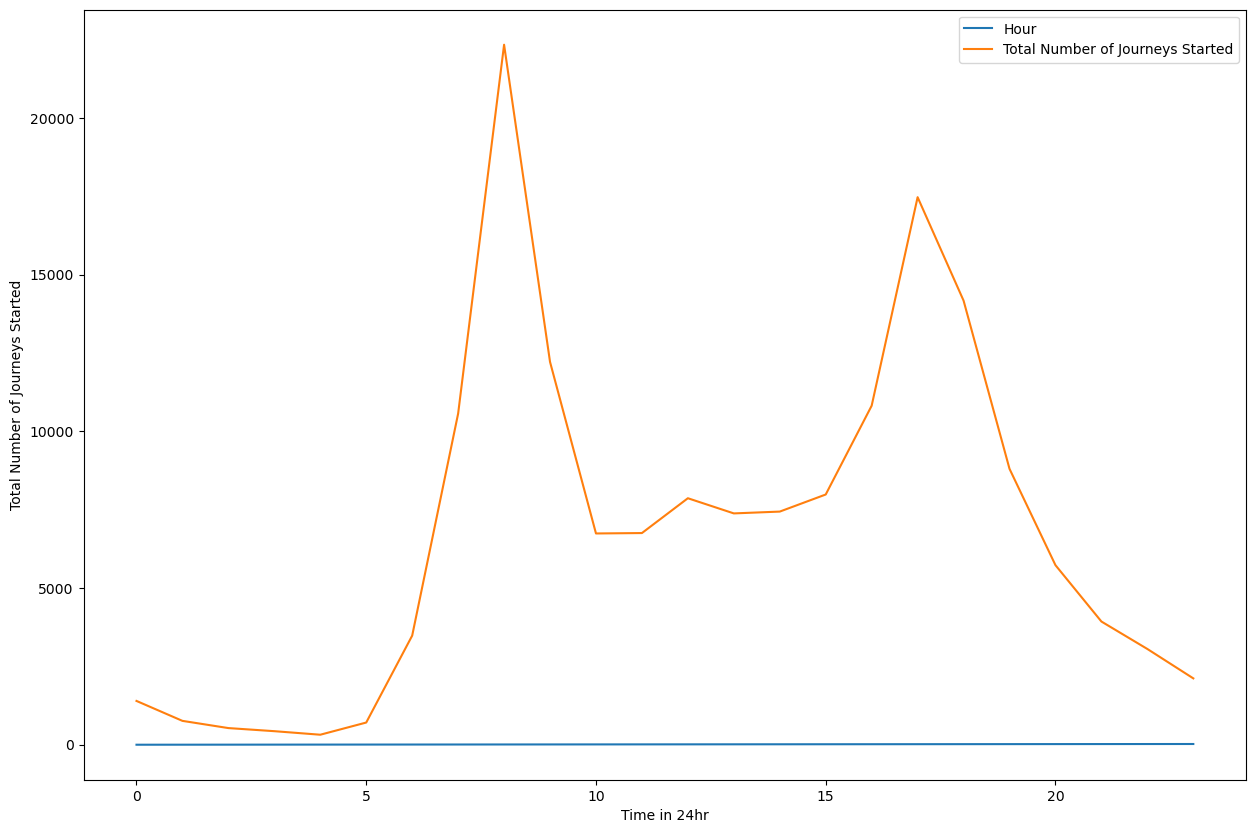

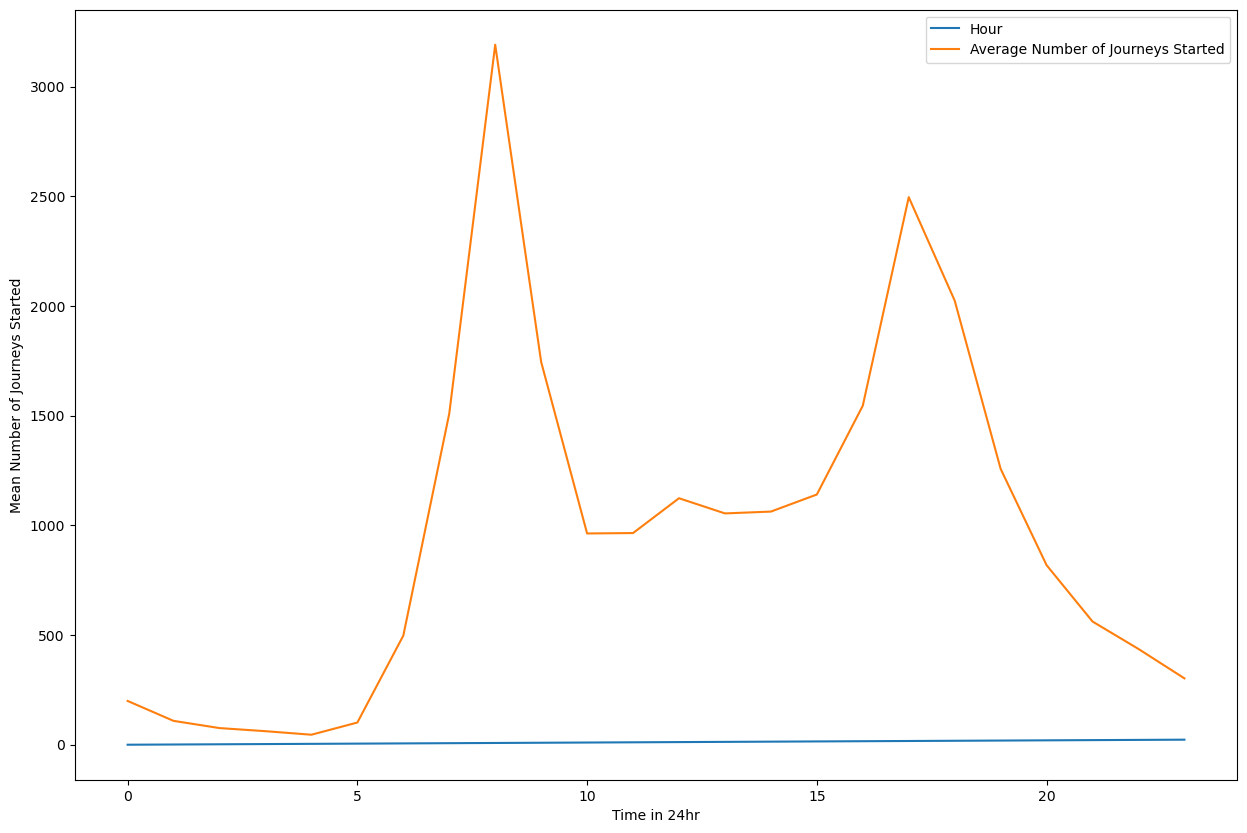

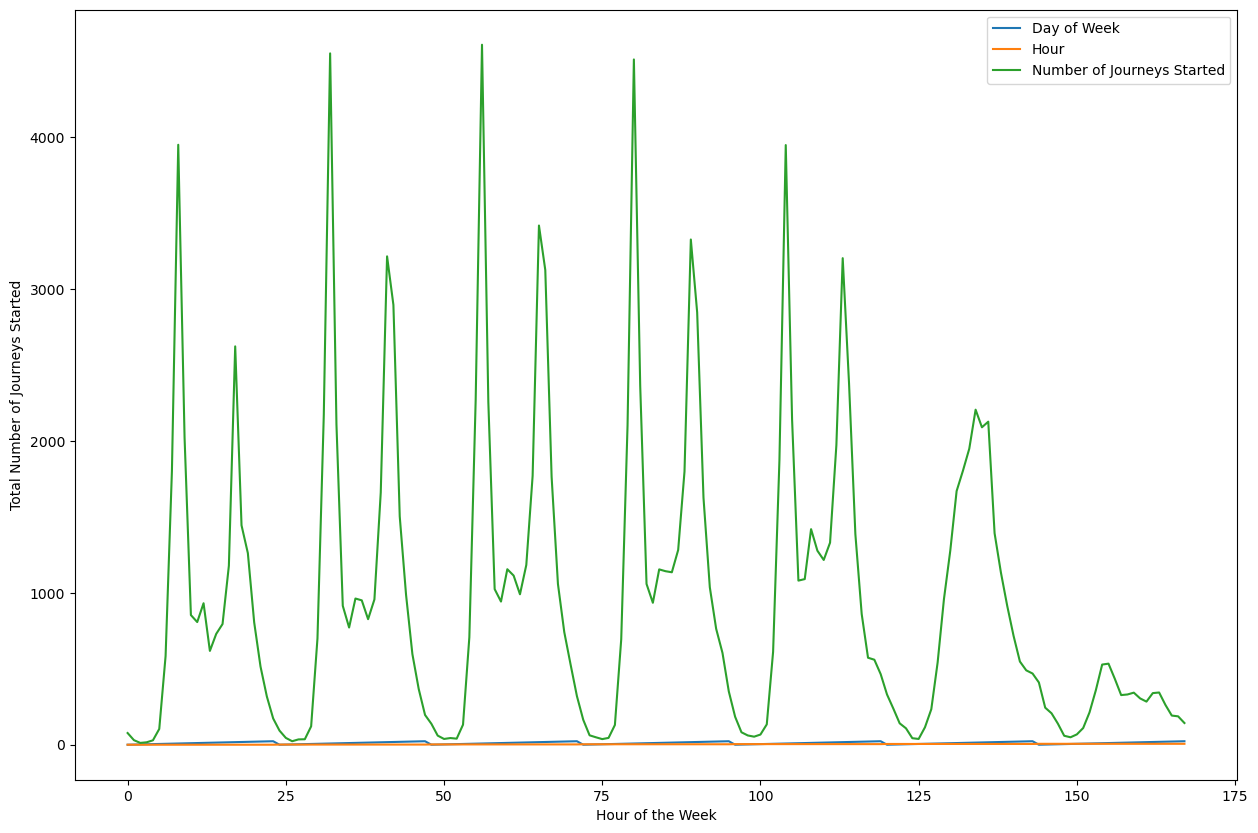

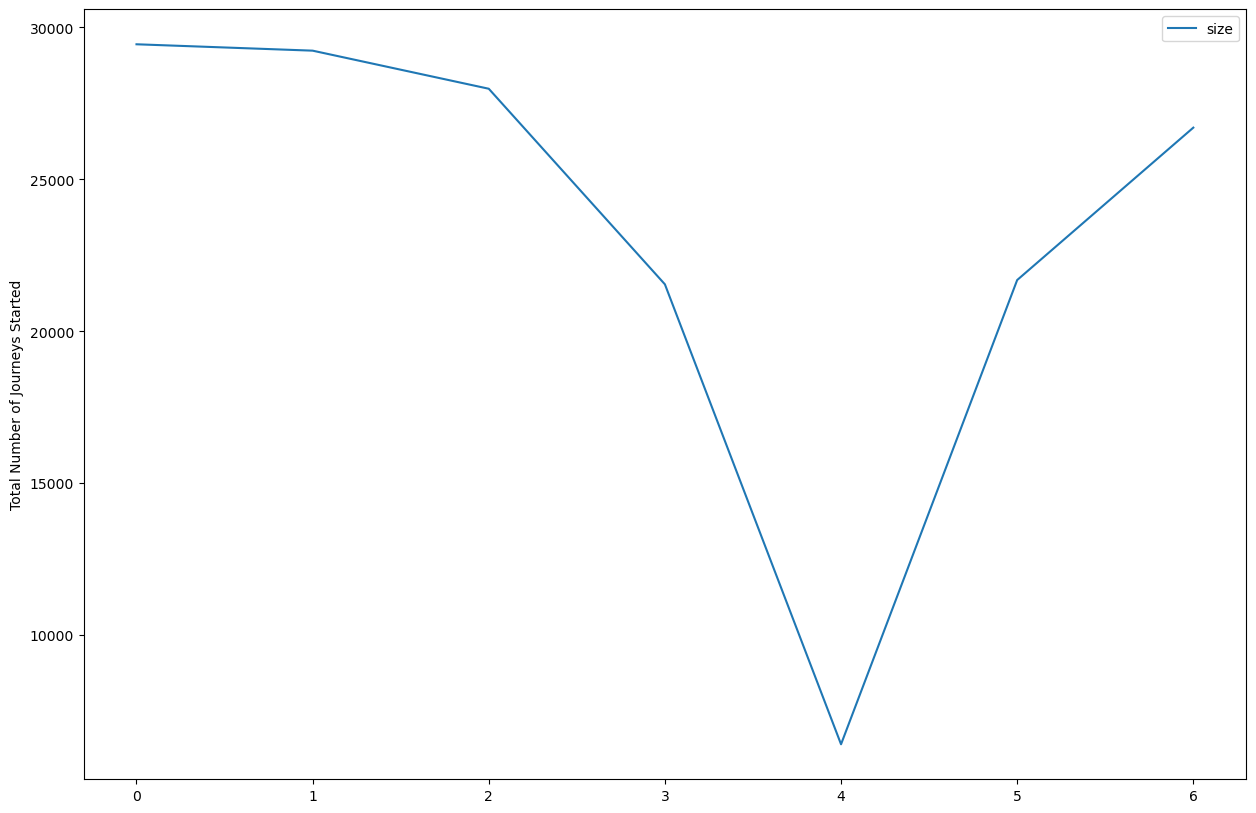

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

from ipynb.fs.full.Process_Demand import getDFfromCSV, startTable
print("imported")

In [2]:
stationInfoDF = getDFfromCSV("Cycle hire docking stations.csv")
stationInfoDF

,StationId,StationName,longitude,latitude,Easting,Northing
0,1,"River Street, Clerkenwell",-0.109971,51.529200,531202.520,182832.020
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600,525207.070,179391.860
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300,532984.810,182001.530
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100,530436.760,182911.990
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100,528051.649,178742.097
...,...,...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966,528720.000,177072.000
798,836,"York Way, Kings Cross",-0.125442,51.541596,530095.000,184187.000
799,835,"Farringdon Street, Holborn",-0.104948,51.516785,531588.000,181465.000
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093,532524.000,181634.000


In [3]:
stationCoords = stationInfoDF[["StationId","StationName","longitude","latitude"]]
stationCoords

,StationId,StationName,longitude,latitude
0,1,"River Street, Clerkenwell",-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100
...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966
798,836,"York Way, Kings Cross",-0.125442,51.541596
799,835,"Farringdon Street, Holborn",-0.104948,51.516785
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093


In [7]:
# Average change in the num of bikes per station for the week
# Need to group by station ID because the different data sets have different punctuation for station names

changeNumBikesDF = startTable.groupby(["StartStation Id","StartStation Name"])["Change in number of bikes"].mean().reset_index()
changeNumBikesDF= changeNumBikesDF.rename( {"StartStation Id" : "StationId", "StartStation Name":"StationName"}, axis=1)
changeNumBikesDF

,StationId,StationName,Change in number of bikes
0,1,"River Street , Clerkenwell",-6.428571
1,2,"Phillimore Gardens, Kensington",-5.571429
2,3,"Christopher Street, Liverpool Street",1.714286
3,4,"St. Chad's Street, King's Cross",9.714286
4,5,"Sedding Street, Sloane Square",-8.857143
...,...,...,...
776,834,"Gas Holders, Battersea Park",5.000000
777,835,"Farringdon Street, Holborn",4.285714
778,836,"York Way, Kings Cross",27.142857
779,838,"Fore Street Avenue, Guildhall",8.428571


In [26]:
#Remove the station location data that we dont need
#Has all the geographical coords for the stations in our data, no more or less
inventoryAndCoordsDF = pd.merge(changeNumBikesDF, stationCoords, on="StationId", how="left")
inventoryAndCoordsDF = inventoryAndCoordsDF.drop("StationName_y",axis=1).rename({"StationName_x":"StationName"}, axis=1)
inventoryAndCoordsDF.head(30)

,StationId,StationName,Change in number of bikes,longitude,latitude
0,1,"River Street , Clerkenwell",-6.428571,-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-5.571429,-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",1.714286,-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",9.714286,-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-8.857143,-0.156876,51.493100
5,6,"Broadcasting House, Marylebone",-3.000000,-0.144229,51.518100
6,7,"Charlbert Street, St. John's Wood",11.428571,-0.168074,51.534300
7,8,"Maida Vale, Maida Vale",-4.142857,-0.183486,51.529857
8,9,"New Globe Walk, Bankside",-2.571429,-0.096441,51.507400
9,10,"Park Street, Bankside",8.000000,-0.092754,51.506000


In [19]:
nan_values = inventoryAndCoordsDF[inventoryAndCoordsDF["longitude"].isna()]
print(nan_values)

Empty DataFrame
Columns: [StationId, StationName, Change in number of bikes, longitude, latitude]
Index: []


In [10]:
stationCoordsDF = stationInfoDF[["StationId", "StationName", "longitude", "latitude"]]
stationInfoDF["latitude"] = pd.to_numeric(stationInfoDF["latitude"])
stationInfoDF["longitude"] = pd.to_numeric(stationInfoDF["longitude"])
stationCoordsDF

,StationId,StationName,longitude,latitude
0,1,"River Street, Clerkenwell",-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-0.156876,51.493100
...,...,...,...,...
797,834,"Gas Holders, Battersea Park",-0.147857,51.477966
798,836,"York Way, Kings Cross",-0.125442,51.541596
799,835,"Farringdon Street, Holborn",-0.104948,51.516785
800,838,"Fore Street Avenue, Guildhall",-0.091402,51.518093


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

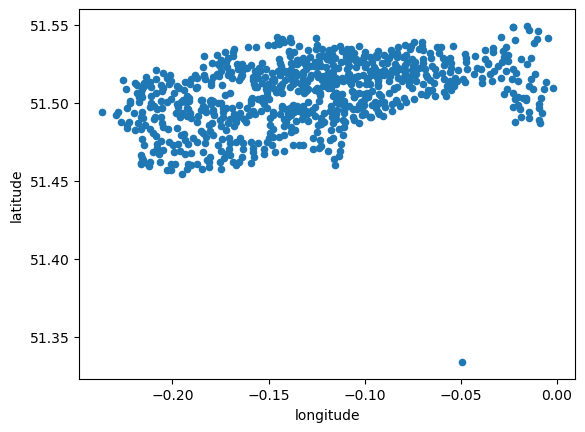

In [27]:
inventoryAndCoordsDF.plot.scatter(x = "longitude", y="latitude")

In [12]:
import folium

def displayMap(coordinateDF):
    londonMap = folium.Map(location= 
                           [coordinateDF.latitude.mean(), 
                            coordinateDF.longitude.mean()],
                          zoom_start = 15, control_scale=True)

    for index,row in coordinateDF.iterrows():
        folium.Marker(location=[row.latitude, row.longitude],
                         popup=row.StationName).add_to(londonMap)
    return londonMap 

displayMap(stationCoordsDF)

In [21]:
displayMap(inventoryAndCoordsDF)